<h1>By: Joel <br> Class: DAAA/2B/06<br> admin no: 2112729</h1>
<h1>

# Cifar-100 
> Collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.State of the art accuracy is at 96.808 as of 2022 

Research on the dataset:
> Cifar 100 contains 80 million tiny dataset images. They are colored which means they have 3 channels and each channel has 32 by 32 pixels.
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

|  SuperClass |  Classes |   
|-------------|---|
| aquatic mammals  |  	beaver, dolphin, otter, seal, whale |  
|   fish    |  	aquarium fish, flatfish, ray, shark, trout | 
|  flowers |  	orchids, poppies, roses, sunflowers, tulips |
|food containers|	bottles, bowls, cans, cups, plates |
|fruit and vegetables|apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|clock, computer keyboard, lamp, telephone, television|
|household furniture|bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
| medium-sized mammals|fox, porcupine, possum, raccoon, skunk|
| non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles_1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles_2|	lawn-mower, rocket, streetcar, tank, tractor|

In [1]:
# pip install keras-tuner --upgrade 

In [2]:
import tensorflow 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
import keras_cv
from keras import layers
from tensorflow import keras

c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploratory Data analysis

## Key conclusions:
- 500 data points per class in train 
- 400 data 

In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [4]:
# split into train and val sets using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 100
4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64
after (40000, 100) (10000, 100)


In [5]:
# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


X_train shape: (32000, 32, 32, 3) y_train shape: (32000, 100)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 100)
0.0    31680
1.0      320
Name: 0, dtype: int64


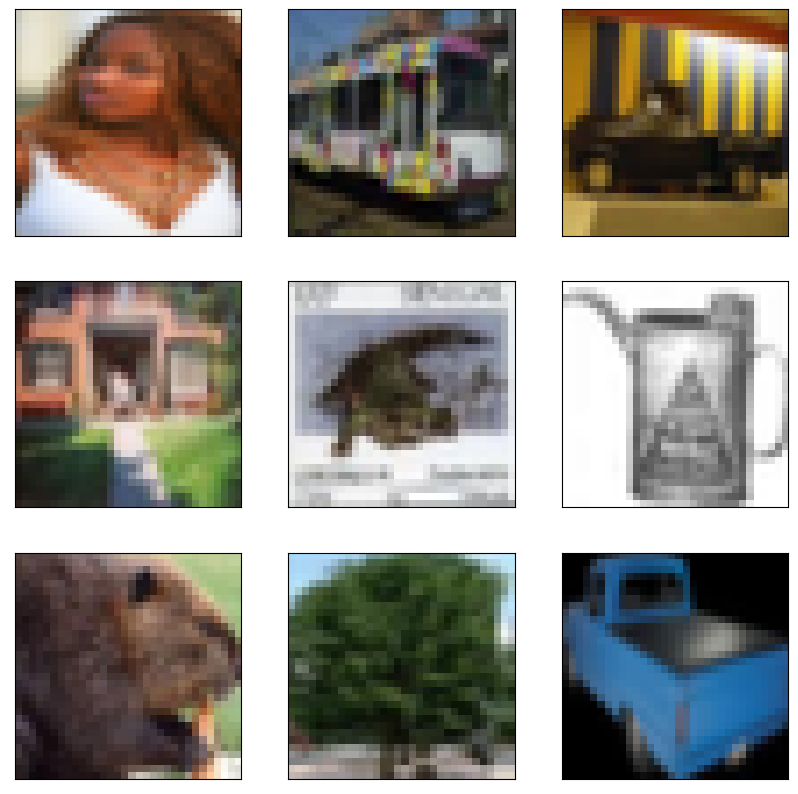

In [6]:
# show some images of the dataset
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set(xticks=[], yticks=[])
plt.show()



In [9]:
# Functions for plotting
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

# CNN Baseline
> CIFAR 100 seems to be alot harder for a simple CNN model to recognize

![](./image/Filtering.gif)
> Image is different from a typical MNIST dataset as it is now coloured, below is a sneak peak of what goes on in the code below

In [10]:


epochs = 15
num_classes = 100
seed = np.random.seed(1)






cifar_model = Sequential()
cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
cifar_model.add(Flatten())
cifar_model.add(Dense(128, activation='relu'))
cifar_model.add(Dense(num_classes, activation='softmax'))

cifar_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
cifar_model.summary()

h_callback = cifar_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               6422656   
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
Total params: 6,454,948
Trainable params: 6,454,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1000/1000 [======================

# Data augmentation
> I definitely do not have enough datasets and will have to create more data by augmenting .

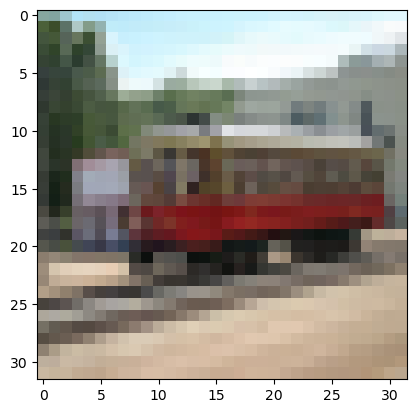

In [11]:
# plot a random image
plt.imshow(X_test[12])
plt.show()

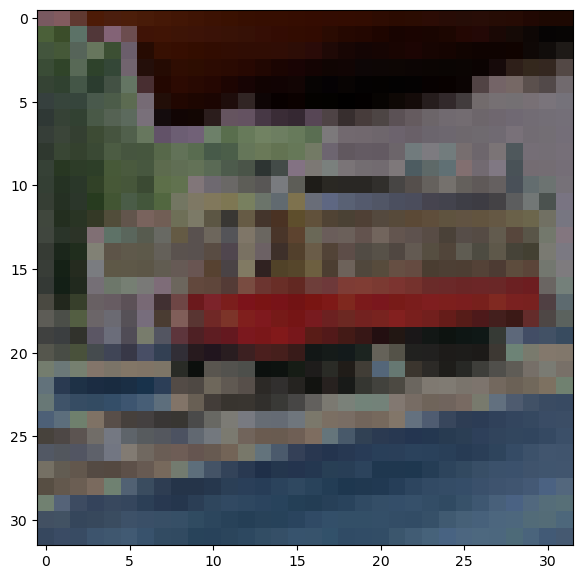

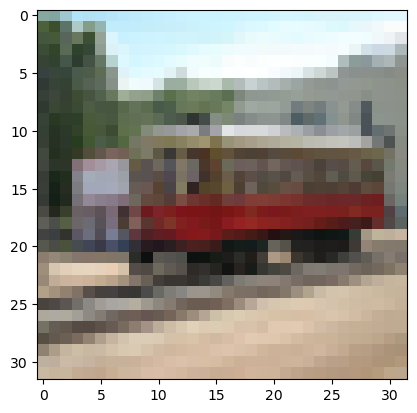

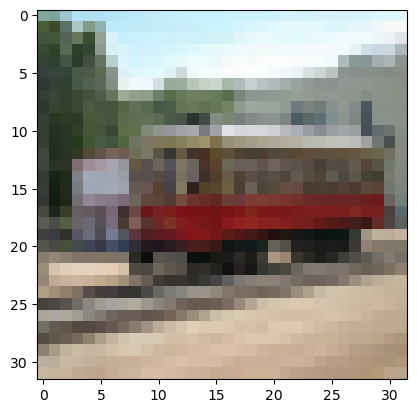

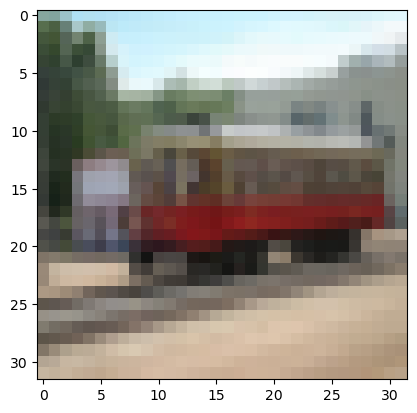

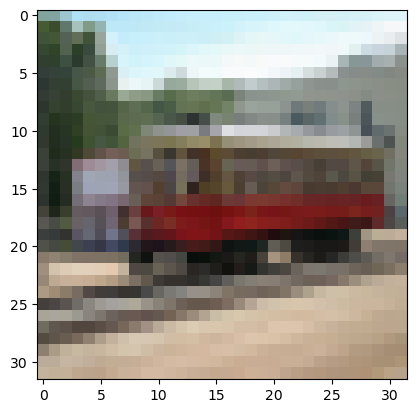

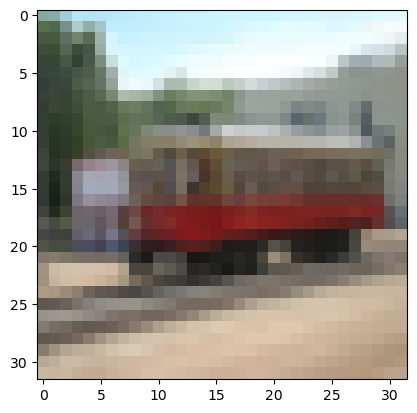

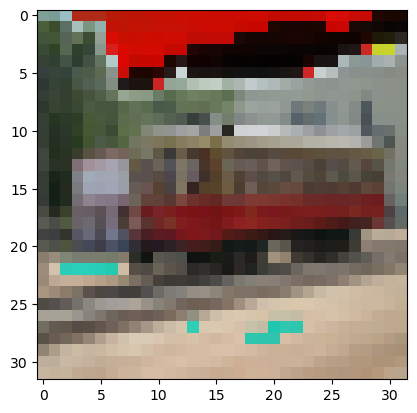

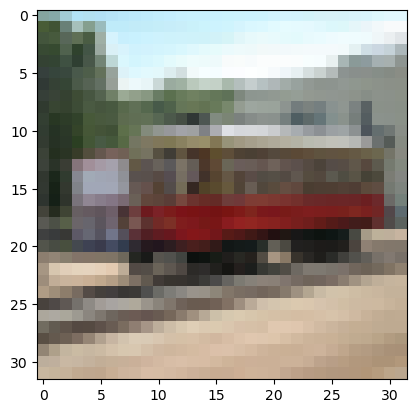

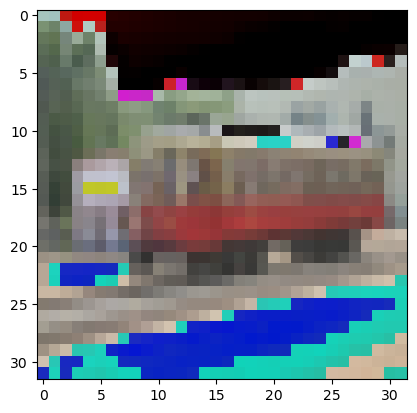

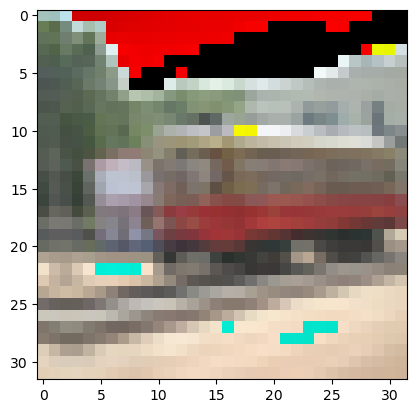

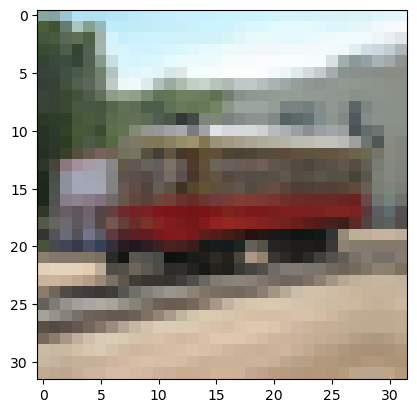

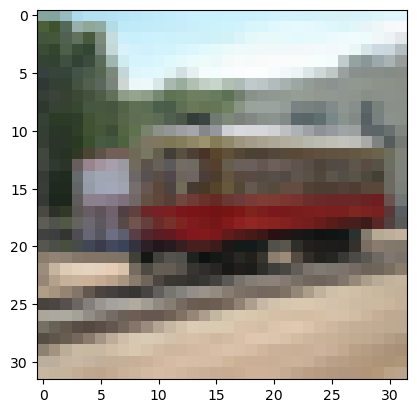

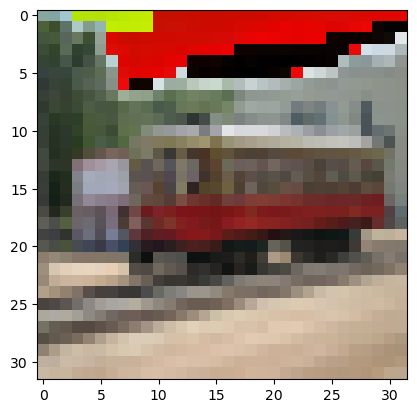

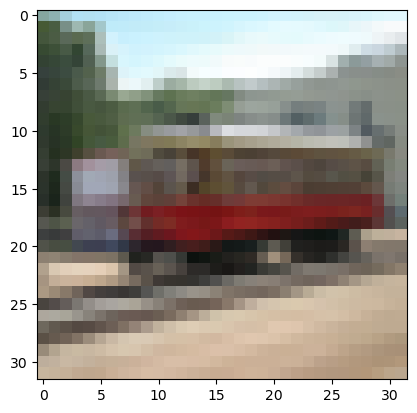

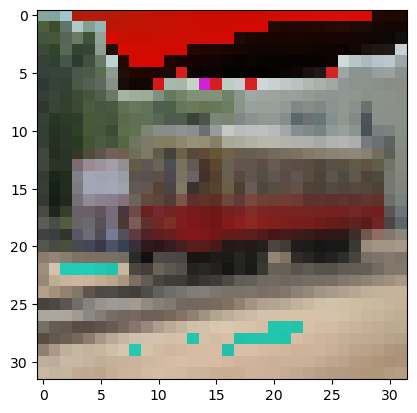

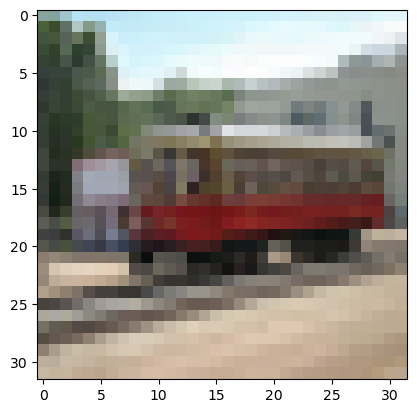

In [12]:

# use randaugment to augment the image
fig = plt.figure(figsize=(32, 32))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    augmented_image = keras_cv.layers.RandAugment(value_range=(0, 255), magnitude=0.01)(X_test[12])
    plt.imshow(augmented_image.numpy().astype("int"))
    plt.show()

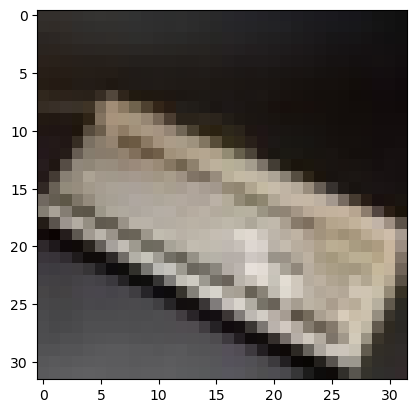

c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\preprocessing\image.py:1446: UserWarning:

This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


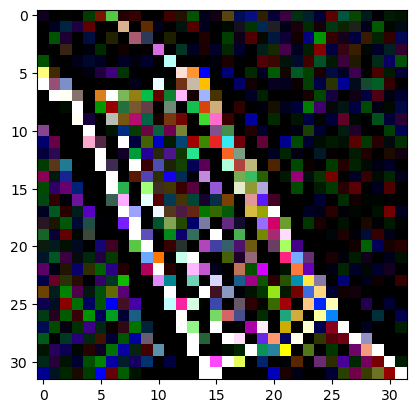

In [13]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# split into train and val sets using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
plt.imshow(X_train[12])
plt.show()


X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()



# ImageDataGenerator rotation
datagen = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.02,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True)


datagen.fit(X_train_augmented)
X_train_augmented = datagen.flow(X_train_augmented,y_train_augmented, batch_size = X_train.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented = X_train_augmented[0].astype('float32')

plt.imshow(X_train_augmented[12])
plt.show()




# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented),axis=0)
y_train = np.concatenate((y_train,y_train_augmented),axis=0)


## Feature wise Normalizaion, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)

# Dense Neural Network / Multi layer perceptrons (MLPs) 
## MLP is a Artificial Neural Network consisting of at least 3 layers ( input , hidden layer and output) 

In [14]:
def plot_loss(loss,test_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(test_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 100)               3300      
                                                                 
Total params: 406,980
Trainable params: 406,980
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2500/2500 [==========================

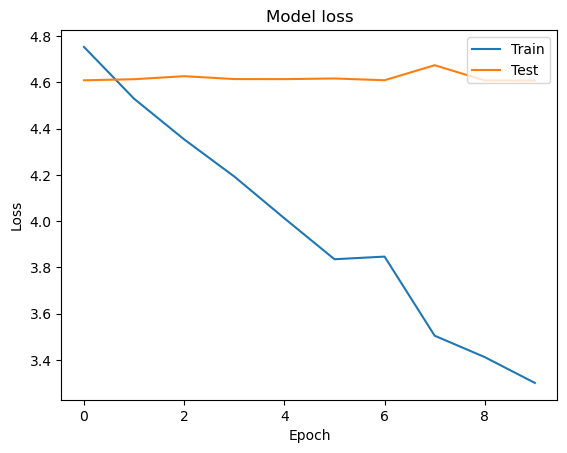

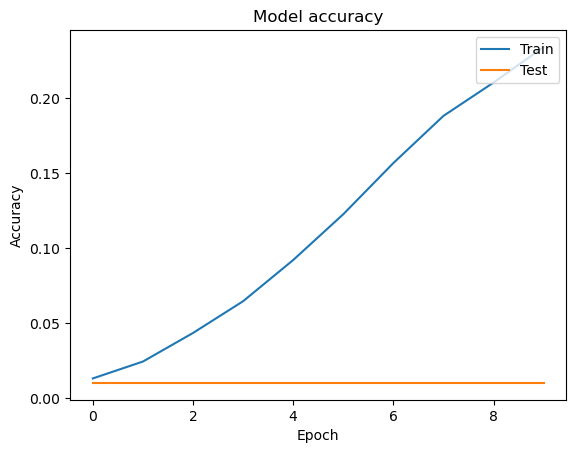

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 10,
               validation_data=(X_val, y_val))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])





## Conclusion on MLP

In [17]:
# baseline cnn model for cifar mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		h_callback = EarlyStopping(monitor='val_loss', patience=5)
		# fit model
		history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback], batch_size=32) 
		# evaluate model
		_, acc = model.evaluate(valX, valy, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
	# evaluate model
	scores, histories = evaluate_model(model,X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


# CNNs 
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

> 15.080
> 12.610
> 12.670
> 12.870
> 13.030


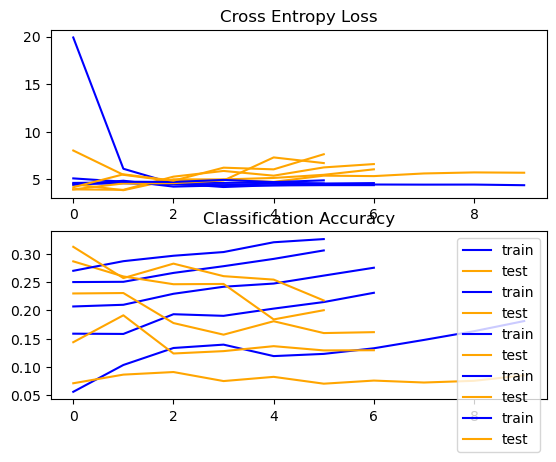

Accuracy: mean=13.252 std=0.926, n=5


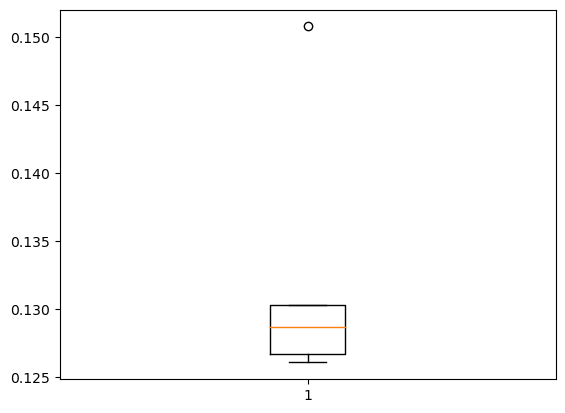

In [18]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_max_pooling(),X_train, y_train)


In [19]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

### Conclusion Max Pooling or Average Pooling
> 

# Padding ( is it important? )

> 13.290
> 13.880
> 14.280
> 15.340
> 15.700


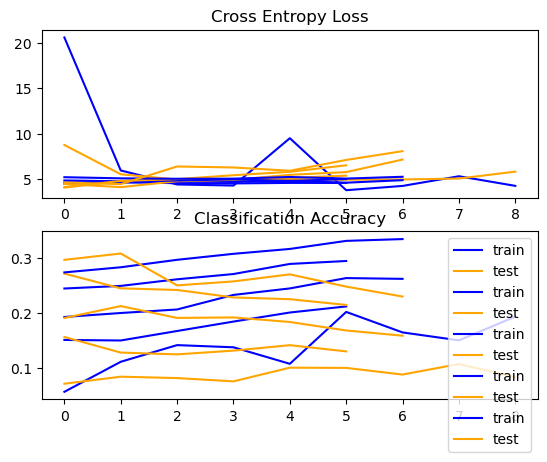

Accuracy: mean=14.498 std=0.899, n=5


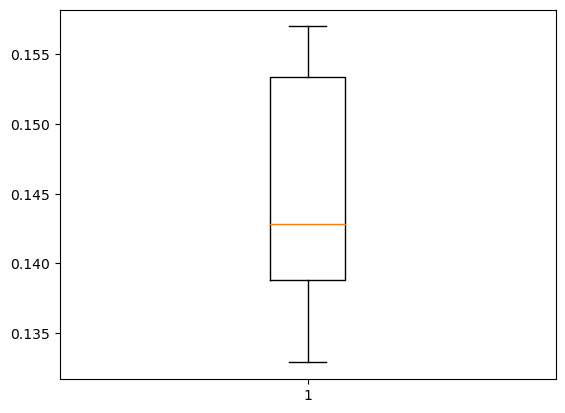

In [27]:
def model_padding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3), padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_padding(),X_train, y_train)

# Batch Normalization

In [28]:
%%time
from keras.layers import BatchNormalization
def cifar_model_batch_norm():
    cifar_model_batch = Sequential()
    cifar_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))

    cifar_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
    cifar_model_batch.add(BatchNormalization())
    cifar_model_batch.add(Flatten())
    cifar_model_batch.add(Dense(128, activation='linear'))
    cifar_model_batch.add(Dense(num_classes, activation='softmax'))
    cifar_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model_batch.summary()
    return cifar_model_batch

run_test_harness(cifar_model_batch_norm(),X_train, y_train)




Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 flatten_11 (Flatten)        (None, 50176)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               6422656   
                                                                 
 dense_19 (Dense)            (None, 100)               12900     
                                                     

KeyboardInterrupt: 

# Adding dropout

In [ ]:
def model_dropout():
    cifar_model = Sequential()
    cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    cifar_model.add(MaxPooling2D((2, 2)))
    cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Conv2D(128, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Flatten())
    cifar_model.add(Dense(128, activation='relu'))
    cifar_model.add(Dropout(0.2))
    cifar_model.add(Dense(num_classes, activation='softmax'))

    cifar_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model.summary()
    return cifar_model

run_test_harness(model_dropout(),X_train, y_train)


# Best Optimizers with Activation function

In [ ]:
from keras.callbacks import ReduceLROnPlateau
### function for looping through all the models
def tune_model_act_opt(act,opt):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=act,
                    kernel_initializer='he_normal',
                    input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))  
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    summarize_diagnostics(history,act,opt)
    return (acc*100)
    

In [ ]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',LeakyReLU(alpha=0.01)]
scores_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc = run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    scores_act_opt.append(acc)
    



ValueError: in user code:

    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)


# Regularization 
## L1

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## L1L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Keras tuner model 1 

In [ ]:
import keras_tuner
from tensorflow import keras
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
 
toy_resnet = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data = [X_val, y_val], callbacks=[early_stopping,reduce_lr])
plot_accuracy_and_loss(toy_resnet)


# Exploring on Cifar 10 (coarse)

In [ ]:
# import cifar 10
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="coarse")
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print number of samples in each class
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


# Data augmentation

In [ ]:
X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()



# ImageDataGenerator rotation
datagen = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-06,
    rotation_range=90,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.02,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True)


datagen.fit(X_train_augmented)
X_train_augmented = datagen.flow(X_train_augmented,y_train_augmented, batch_size = X_train.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented = X_train_augmented[0].astype('float32')

plt.imshow(X_train_augmented[12])
plt.show()




# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented),axis=0)
y_train = np.concatenate((y_train,y_train_augmented),axis=0)


In [ ]:


epochs = 15
num_classes = 20
seed = np.random.seed(1)






model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
mc = ModelCheckpoint('dummy_model_20.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val) , callbacks=[early_stopping, mc])

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



# Feature wise Normalizaion, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)

In [ ]:
# baseline cnn model for cifar mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import cifar_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		h_callback = EarlyStopping(monitor='val_loss', patience=5)
		# fit model
		history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback], batch_size=32) 
		# evaluate model
		_, acc = model.evaluate(valX, valy, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
	# evaluate model
	scores, histories = evaluate_model(model,X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


# CNNs 
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

In [ ]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_max_pooling(),X_train, y_train)


In [ ]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

### Conclusion Max Pooling or Average Pooling
> 

# Padding ( is it important? )

In [ ]:
def model_padding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)), padding='same')
    model.add(MaxPooling2D((2, 2)), padding='same')
    model.add(Flatten())
    model.add(Dense(128, activation='linear'), padding='same')
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_padding(),X_train, y_train)

# Batch Normalization

In [ ]:
%%time
from keras.layers import BatchNormalization
def cifar_model_batch_norm():
    cifar_model_batch = Sequential()
    cifar_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3)))

    cifar_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
    cifar_model_batch.add(BatchNormalization())
    cifar_model_batch.add(Flatten())
    cifar_model_batch.add(Dense(128, activation='linear'))
    cifar_model_batch.add(Dense(num_classes, activation='softmax'))
    cifar_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model_batch.summary()
    return cifar_model_batch

run_test_harness(cifar_model_batch_norm(),X_train, y_train)




# Adding dropout

In [ ]:
def model_dropout():
    cifar_model = Sequential()
    cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
    cifar_model.add(MaxPooling2D((2, 2)))
    cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Conv2D(128, (3, 3), activation='relu'))
    cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
    cifar_model.add(Flatten())
    cifar_model.add(Dense(128, activation='relu'))
    cifar_model.add(Dropout(0.2))
    cifar_model.add(Dense(num_classes, activation='softmax'))

    cifar_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    cifar_model.summary()
    return cifar_model

run_test_harness(model_dropout(),X_train, y_train)


# Best Optimizers with Activation function

In [ ]:
from keras.callbacks import ReduceLROnPlateau
### function for looping through all the models
def tune_model_act_opt(act,opt):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=act,
                    kernel_initializer='he_normal',
                    input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation=act))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))  
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    summarize_diagnostics(history,act,opt)
    return (acc*100)
    

In [ ]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',LeakyReLU(alpha=0.01)]
scores_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc = run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    scores_act_opt.append(acc)
    



# Regularization 
## L1

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


## L1L2

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 100,
                validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [ ]:
# online model
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
model.summary()

In [ ]:
# training without augmentation
history=model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val))
#training accuracy without dropout
train_acc=model.evaluate(X_train,y_train,batch_size=128)
test_acc= model.evaluate(X_test,y_test,batch_size=128)
print('Training accuracy: ',train_acc[1])
print('Test accuracy: ',test_acc[1])


# Keras tuner model 1 

In [ ]:
import keras_tuner
from tensorflow import keras
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

# things not done :
- data frame for all models for fashion also
- create a classification_report for best model
- show some images that is predicted wrongly for both
- padding for fashion
- shared layer for both is it better?
- why is standardization import or centering does it improve performance
